In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [20]:
df = pd.read_csv('/Users/phupha/Desktop/PJME_hourly.csv') 
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [22]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


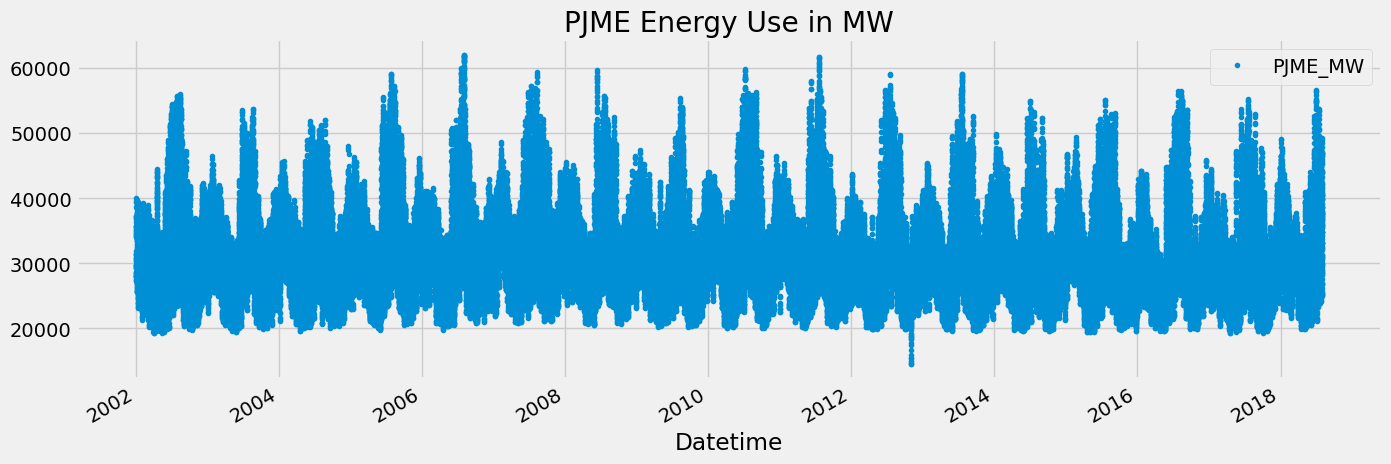

In [23]:
#plot to see outlier

df.plot(style='.',
       figsize = (15,5),
       color = color_pal[0],
       title = 'PJME Energy Use in MW')

plt.show()

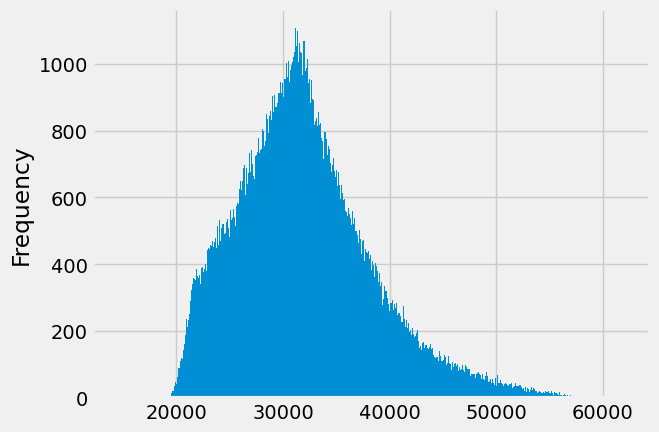

In [26]:
#histogram of data

df['PJME_MW'].plot(kind='hist', bins=500)
plt.show()

# cross validation

In [28]:
#cross validation

from sklearn.model_selection import TimeSeriesSplit
#split data into 5 groups, test set is 1 year, 365 days,(365 rows multiply by 24 hours), gap between train and test set is 24 hours(rows)
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap = 24)
#have to sort index in order for time series split to work
df = df.sort_index()

In [35]:
for train_idx, val_idx in tss.split(df):
    break

In [36]:
train_idx

array([     0,      1,      2, ..., 101539, 101540, 101541])

In [37]:
val_idx

array([101566, 101567, 101568, ..., 110323, 110324, 110325])

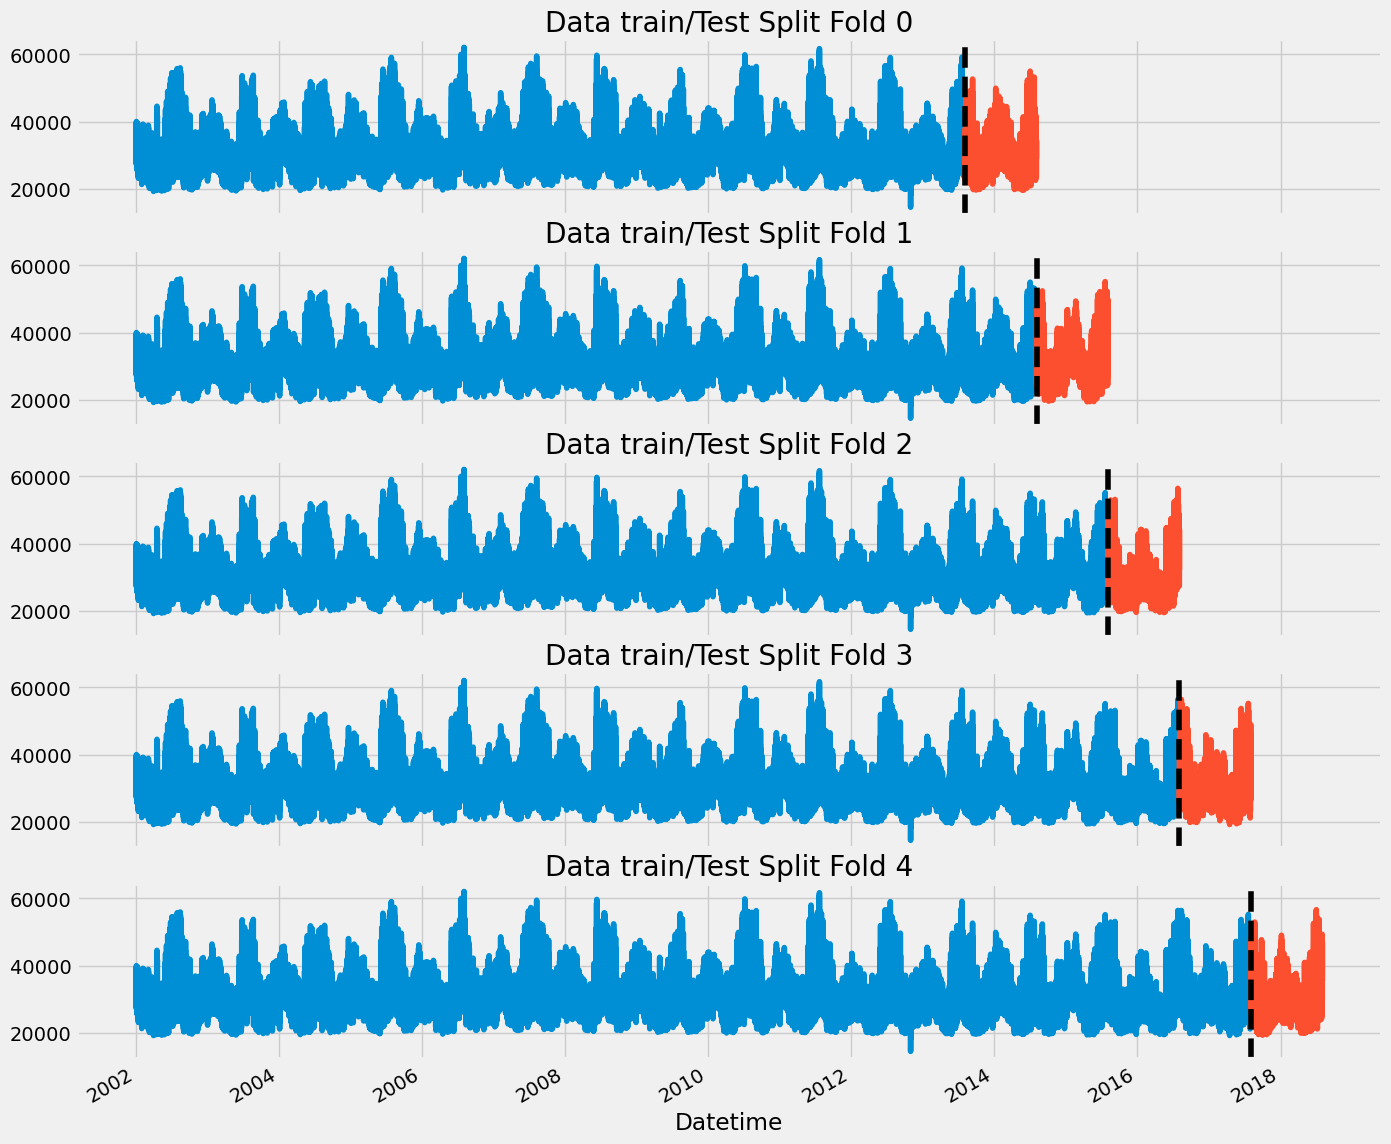

In [56]:
#show how test data is split

fig, axs = plt.subplots(5, 1, figsize=(15, 15),
                             sharex=True)

#share_x means share x axis
fold=0
for train_idx, val_idx in tss.split(df):
    #iloc is interger location
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['PJME_MW'].plot(ax=axs[fold],
                         label='Training Set',
                         title=f'Data train/Test Split Fold {fold}')
    test['PJME_MW'].plot(ax=axs[fold],
                        label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold+=1

plt.show()


In [ ]:
def create_features(df):
    df = df.copy()
    